# MARATONA BEHIND THE CODE 2020

## DESAFIO 2: PARTE 2

In [1]:
!pip install scikit-learn==0.20.0 --upgrade

Requirement already up-to-date: scikit-learn==0.20.0 in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.20.0)


In [2]:
!rm -r -f sklearn_transforms

In [3]:
# substitua o link abaixo pelo link do seu repositório git (se for o caso)
!git clone https://github.com/rodrigolima82/sklearn_transforms.git

Cloning into 'sklearn_transforms'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 60 (delta 28), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (60/60), done.


In [4]:
!cd sklearn_transforms
!ls -ltr

total 80
-rw-r----- 1 dsxuser dsxuser 76716 Aug 26 01:57 sklearn_transforms.zip
drwxr-x--- 6 dsxuser dsxuser  4096 Aug 26 01:59 sklearn_transforms


In [5]:
!zip -r sklearn_transforms.zip sklearn_transforms

updating: sklearn_transforms/ (stored 0%)
updating: sklearn_transforms/setup.py (deflated 47%)
updating: sklearn_transforms/dist/ (stored 0%)
updating: sklearn_transforms/dist/my_custom_sklearn_transforms-1.0-py2.7.egg (deflated 15%)
updating: sklearn_transforms/my_custom_sklearn_transforms.egg-info/ (stored 0%)
updating: sklearn_transforms/my_custom_sklearn_transforms.egg-info/SOURCES.txt (deflated 63%)
updating: sklearn_transforms/my_custom_sklearn_transforms.egg-info/PKG-INFO (deflated 38%)
updating: sklearn_transforms/my_custom_sklearn_transforms.egg-info/top_level.txt (stored 0%)
updating: sklearn_transforms/my_custom_sklearn_transforms.egg-info/not-zip-safe (stored 0%)
updating: sklearn_transforms/my_custom_sklearn_transforms.egg-info/dependency_links.txt (stored 0%)
updating: sklearn_transforms/my_custom_sklearn_transforms/ (stored 0%)
updating: sklearn_transforms/my_custom_sklearn_transforms/__init__.py (stored 0%)
updating: sklearn_transforms/my_custom_sklearn_transforms/sklea

In [6]:
!pip install sklearn_transforms.zip

Processing ./sklearn_transforms.zip
  Using cached https://files.pythonhosted.org/packages/4b/c4/57e246bc99e45c048f9805f2773e7369f0d30896d19fa089fa1794c7b246/xgboost-0.71.tar.gz
  Stored in directory: /home/dsxuser/.tmp/pip-ephem-wheel-cache-qgxm_ui4/wheels/8f/88/32/f886e7510a37b111e2a1b7e689e04450acda46732970a7ed78
  Stored in directory: /home/dsxuser/.cache/pip/wheels/4e/6d/1d/0bc23240225fe411315d8abb5d4521b9ff002493ff77515ccc
Successfully built my-custom-sklearn-transforms xgboost
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
  Found existing installation: my-custom-sklearn-transforms 1.0
    Uninstalling my-custom-sklearn-transforms-1.0:
      Successfully uninstalled my-custom-sklearn-transforms-1.0


In [7]:
import pandas as pd
import numpy as np
from numpy import nan, dtype, mean
import math

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

import sklearn.ensemble
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

#from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, classification_report

from sklearn.impute import SimpleImputer
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Desativando warnings no jupyter
import warnings
warnings.filterwarnings('ignore')

In [8]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8c046a5bad624f089a7f298a70954a3c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wX1S0thSGBG3xa5tstP2HL4egopb8KCe0nO6b0w4qgZL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8c046a5bad624f089a7f298a70954a3c.get_object(Bucket='desafio02uninassau-donotdelete-pr-bigaju85ckcqdm',Key='dataset_desafio_2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


In [9]:
# Remove todos os registros que tem algum dado vazio
df.dropna(inplace=True)

In [10]:
from my_custom_sklearn_transforms.sklearn_transformers import DropColumns

rm_columns = DropColumns(
    columns=["NOME","MATRICULA"]
)

In [11]:
# Definição das colunas que serão features (nota-se que a coluna NOME não está presente)
features = [
    "NOME", "MATRICULA", 'REPROVACOES_DE', 'REPROVACOES_EM', "REPROVACOES_MF", "REPROVACOES_GO",
    "NOTA_DE", "NOTA_EM", "NOTA_MF", "NOTA_GO",
    "INGLES", "H_AULA_PRES", "TAREFAS_ONLINE", "FALTAS"
]

# Definição da variável-alvo
target = ["PERFIL"]

# Preparação dos argumentos para os métodos da biblioteca ``scikit-learn``
X = df[features]
y = df[target]

# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=337)

In [12]:
params = {'n_estimators'    : 522,
          'max_depth'       : 18,
          'min_child_weight': 9,
          'learning_rate'   : 0.01, #1.0629240007839114e-08,
          'subsample'       : 0.9,
          'colsample_bytree': 0.8,
          'silent'          : 1}

# Criando o modelo
modelo_xgb = xgb.XGBClassifier(**params)



# Preparando o Pipeline

In [13]:

# Criação da nossa pipeline para armazenamento no Watson Machine Learning:
pipeline = Pipeline(
    steps=[
        ('remove_cols', rm_columns),
        ('scale', MinMaxScaler()),
        ('model', modelo_xgb)
    ]
)

In [14]:
# Inicialização da Pipeline (pré-processamento e realização do treinamento do modelo)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('remove_cols', DropColumns(columns=['NOME', 'MATRICULA'])), ('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=18...,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.9))])

Acurácia: 81.46%
Sensibilidade : 0.9189526184538653
Especificidade : 0.7891061452513967


              precision    recall  f1-score   support

 DIFICULDADE       0.90      0.77      0.83       731
      EXATAS       0.81      0.91      0.86       806
   EXCELENTE       0.57      0.60      0.58        67
     HUMANAS       0.77      0.91      0.84       302
   MUITO_BOM       0.38      0.13      0.19        95

   micro avg       0.81      0.81      0.81      2001
   macro avg       0.68      0.66      0.66      2001
weighted avg       0.81      0.81      0.80      2001



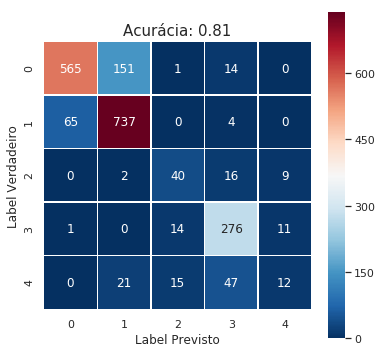

In [15]:
# Fazendo previsões
xgb_y_pred = pipeline.predict(X_test)
previsoes = [value for value in xgb_y_pred]

# Avaliando as previsões
xgb_score = accuracy_score(y_test, previsoes)
print("Acurácia: %.2f%%" % (xgb_score * 100.0))

# Cria a matriz de confusão
conf_matriz_xgb = confusion_matrix(y_test, xgb_y_pred)
    
# Calcula especificidade e sensibilidade
speci_xgb = conf_matriz_xgb[0,0] / (conf_matriz_xgb[0,0] + conf_matriz_xgb[0,1])
sensi_xgb = conf_matriz_xgb[1,1] / (conf_matriz_xgb[1,0] + conf_matriz_xgb[1,1])

# Print
print('Sensibilidade :', sensi_xgb)
print('Especificidade :', speci_xgb)
print('\n')

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz_xgb, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(xgb_score), size = 15)

# Relatório de Classificação
print(classification_report(y_test, xgb_y_pred))

In [16]:
# Biblioteca Python com implementação de um cliente HTTP para a API do WML
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-08-26 02:03:40,764 - watson_machine_learning_client.wml_client_error - WARNING - Failure during getting all runtimes. (GET https://eu-de.ml.cloud.ibm.com/v4/runtimes?limit=1000)
Status code: 404, body: {"trace":"2rbjct2guj7u","errors":[{"code":"not_found","message":"Requested object a1f5ae10-311a-46ce-86df-b49f9a21139e could not be found."}]}
2020-08-26 02:03:40,768 - watson_machine_learning_client.repository - ERROR - Failure during getting all runtimes. (GET https://eu-de.ml.cloud.ibm.com/v4/runtimes?limit=1000)
Status code: 404, body: {"trace":"2rbjct2guj7u","errors":[{"code":"not_found","message":"Requested object a1f5ae10-311a-46ce-86df-b49f9a21139e could not be found."}]}
2020-08-26 02:03:46,651 - watson_machine_learning_client.wml_client_error - WARNING - Failure during getting all runtimes. (GET https://eu-de.ml.cloud.ibm.com/v4/runtimes?limit=1000)
Status code: 404, body: {"trace":"17cf57e094995876ec56400b38b9c4cf","errors":[{"code":"not_found","message":"Requested object

In [17]:
wml_credentials = {
  "apikey": "ga1uFVMXy5Sg_sC5dCrEL79NoKKtFZ3HeeN_lBU10tV4",
  "iam_apikey_description": "Auto-generated for key 5b7323f1-f6d1-413c-9828-ac9bdc64fa04",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/e0a6290a3eca4af19593d4664e3d771f::serviceid:ServiceId-44460261-9e50-43b5-bf41-8c3211c7eef8",
  "instance_id": "75172e33-f7bf-4536-9296-7d56c72b6565",
  "url": "https://eu-de.ml.cloud.ibm.com"
}

In [18]:
# Instanciando um objeto cliente do Watson Machine Learning a partir das credenciais fornecidas
clientWML = WatsonMachineLearningAPIClient(wml_credentials)

In [19]:
# Extraindo detalhes da sua instância do Watson Machine Learning
import json
import requests

instance_details = clientWML.service_instance.get_details()
print(json.dumps(instance_details, indent=4))

{
    "entity": {
        "source": "Bluemix",
        "published_models": {
            "url": "https://eu-de.ml.cloud.ibm.com/v3/wml_instances/75172e33-f7bf-4536-9296-7d56c72b6565/published_models"
        },
        "usage": {
            "capacity_units": {
                "current": 16502440,
                "limit": 180000000
            },
            "computation_time": {
                "current": 0,
                "limit": 180000
            },
            "deployment_count": {
                "current": 1,
                "limit": 5
            },
            "expiration_date": "2020-09-01T00:00:00.000Z",
            "gpu_count_k80": {
                "current": 0,
                "limit": 8
            },
            "gpu_count_p100": {
                "current": 0,
                "limit": 0
            },
            "gpu_count_v100": {
                "current": 0,
                "limit": 0
            },
            "model_count": {
                "current": 2,
     

In [24]:
# Listando todos os artefatos atualmente armazenados na sua instância do WML

clientWML.repository.list()

----  ----  -------  ---------  ----
GUID  NAME  CREATED  FRAMEWORK  TYPE
----  ----  -------  ---------  ----


In [23]:
artifact_guid = "a1f5ae10-311a-46ce-86df-b49f9a21139e"
clientWML.repository.delete(artifact_guid)

'SUCCESS'

No plano LITE do Watson Machine Learning só é permitido o deploy de um único modelo por vez. Se for o caso de você já possuir um modelo online na sua instância, você pode apagá-lo utilizando o método clientWML.repository.delete():

    artifact_guid = "359c8951-d2fe-4063-8706-cc06b32d5e0d"
    clientWML.repository.delete(artifact_guid)

In [ ]:
# Listando todos runtimes armazenados no seu WML:
#clientWML.runtimes.list()

#### Criando uma nova definição de Pipeline personalizada no WML

Finalmente iremos criar uma definição (metadados) para a nossa Pipeline ser hospedada no WML.

Definimos como parâmetros um nome para o artefato e o ID do runtime criado anteriormente.

In [25]:
# Definição de metadados do nosso pacote com as Transforms personalizadas
pkg_meta = {
    clientWML.runtimes.LibraryMetaNames.NAME: "my_custom_sklearn_transform_1",
    clientWML.runtimes.LibraryMetaNames.DESCRIPTION: "A custom sklearn transform",
    clientWML.runtimes.LibraryMetaNames.FILEPATH: "sklearn_transforms.zip",  # Note que estamos utilizando o .zip criado anteriormente!
    clientWML.runtimes.LibraryMetaNames.VERSION: "1.0",
    clientWML.runtimes.LibraryMetaNames.PLATFORM: { "name": "python", "versions": ["3.6"] }
}
custom_package_details = clientWML.runtimes.store_library( pkg_meta )
custom_package_uid = clientWML.runtimes.get_library_uid( custom_package_details )

print("\n Lista de artefatos de runtime armazenados no WML:")
clientWML.repository.list()


 Lista de artefatos de runtime armazenados no WML:
------------------------------------  -----------------------------  ------------------------  ---------  --------------
GUID                                  NAME                           CREATED                   FRAMEWORK  TYPE
21442158-0ac7-4739-9792-3858d966f08c  my_custom_sklearn_transform_1  2020-08-26T02:03:44.156Z  -          python library
------------------------------------  -----------------------------  ------------------------  ---------  --------------


In [26]:
runtime_meta = {
    clientWML.runtimes.ConfigurationMetaNames.NAME: "my_custom_wml_runtime_1",
    clientWML.runtimes.ConfigurationMetaNames.DESCRIPTION: "A Python runtime with custom sklearn Transforms",
    clientWML.runtimes.ConfigurationMetaNames.PLATFORM: {
        "name": "python",
        "version": "3.6"
    },
    clientWML.runtimes.ConfigurationMetaNames.LIBRARIES_UIDS: [ custom_package_uid ]
}
runtime_details = clientWML.runtimes.store( runtime_meta )
custom_runtime_uid = clientWML.runtimes.get_uid( runtime_details )

print("\n Detalhes do runtime armazenado:")
print(json.dumps(runtime_details, indent=4))


 Detalhes do runtime armazenado:
{
    "entity": {
        "name": "my_custom_wml_runtime_1",
        "description": "A Python runtime with custom sklearn Transforms",
        "custom_libraries": [
            {
                "name": "my_custom_sklearn_transform_1",
                "url": "https://private.eu-de.ml.cloud.ibm.com/v4/libraries/21442158-0ac7-4739-9792-3858d966f08c",
                "version": "1.0"
            }
        ],
        "content_url": "https://private.eu-de.ml.cloud.ibm.com/v4/runtimes/992e738c-2ca7-4a92-b19f-38e2aa1270d0/content",
        "platform": {
            "name": "python",
            "version": "3.6"
        }
    },
    "metadata": {
        "created_at": "2020-08-26T02:03:46.719Z",
        "guid": "992e738c-2ca7-4a92-b19f-38e2aa1270d0",
        "url": "https://eu-de.ml.cloud.ibm.com/v4/runtimes/992e738c-2ca7-4a92-b19f-38e2aa1270d0"
    }
}


In [27]:
# Listando todos runtimes armazenados no seu WML:
#clientWML.runtimes.list()

In [28]:
model_meta = {
    clientWML.repository.ModelMetaNames.NAME: 'desafio-2-mbtc2020-pipeline-1',
    clientWML.repository.ModelMetaNames.DESCRIPTION: "my pipeline for submission",
    clientWML.repository.ModelMetaNames.RUNTIME_UID: custom_runtime_uid
}

Em seguida chamamos o método para armazenar a nova definição:

In [29]:
# Função para armazenar uma definição de Pipeline no WML
stored_model_details = clientWML.repository.store_model(
    model         = pipeline,
    meta_props    = model_meta,
    training_data = None
)

print("\n Lista de artefatos armazenados no WML:")
clientWML.repository.list()

# Detalhes do modelo hospedado no Watson Machine Learning
print("\n Metadados do modelo armazenado:")
print(json.dumps(stored_model_details, indent=4))


 Lista de artefatos armazenados no WML:
------------------------------------  -----------------------------  ------------------------  -----------------  --------------
GUID                                  NAME                           CREATED                   FRAMEWORK          TYPE
9b72bd04-bf19-45f8-b224-7062cc95cef8  desafio-2-mbtc2020-pipeline-1  2020-08-26T02:03:47.523Z  scikit-learn-0.20  model
21442158-0ac7-4739-9792-3858d966f08c  my_custom_sklearn_transform_1  2020-08-26T02:03:44.156Z  -                  python library
------------------------------------  -----------------------------  ------------------------  -----------------  --------------

 Metadados do modelo armazenado:
{
    "metadata": {
        "guid": "9b72bd04-bf19-45f8-b224-7062cc95cef8",
        "url": "https://eu-de.ml.cloud.ibm.com/v3/wml_instances/75172e33-f7bf-4536-9296-7d56c72b6565/published_models/9b72bd04-bf19-45f8-b224-7062cc95cef8",
        "created_at": "2020-08-26T02:03:47.523Z",
        "modifie

#### Realizando o deployment do seu modelo para consumo imediato por outras aplicações

In [30]:
# O deployment do modelo é finalmente realizado por meio do método ``deployments.create()``

model_deployment_details = clientWML.deployments.create(
    artifact_uid=stored_model_details["metadata"]["guid"],  # Não altere esse parâmetro
    name="desafio-2-mbtc2020-deployment-1",
    description="Solução do desafio 2 - MBTC",
    asynchronous=False,  # Não altere esse parâmetro
    deployment_type='online',  # Não altere esse parâmetro
    deployment_format='Core ML',  # Não altere esse parâmetro
    meta_props=model_meta  # Não altere esse parâmetro
)



#######################################################################################

Synchronous deployment creation for uid: '9b72bd04-bf19-45f8-b224-7062cc95cef8' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS.................................................................
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='dbabd1c3-b750-4d22-831a-6144b1c57ee4'
------------------------------------------------------------------------------------------------




#### Testando um modelo hospedado no Watson Machine Learning

In [31]:
# Recuperando a URL endpoint do modelo hospedado na célula anterior

model_endpoint_url = clientWML.deployments.get_scoring_url(model_deployment_details)
print("A URL de chamada da sua API é: {}".format(model_endpoint_url))

A URL de chamada da sua API é: https://eu-de.ml.cloud.ibm.com/v3/wml_instances/75172e33-f7bf-4536-9296-7d56c72b6565/deployments/dbabd1c3-b750-4d22-831a-6144b1c57ee4/online


In [32]:
# Detalhes do deployment realizado

deployment_details = clientWML.deployments.get_details(
    deployment_uid=model_deployment_details["metadata"]["guid"]  # esse é o ID do seu deployment!
)

print("Metadados do deployment realizado: \n")
print(json.dumps(deployment_details, indent=4))

Metadados do deployment realizado: 

{
    "metadata": {
        "guid": "dbabd1c3-b750-4d22-831a-6144b1c57ee4",
        "url": "https://eu-de.ml.cloud.ibm.com/v3/wml_instances/75172e33-f7bf-4536-9296-7d56c72b6565/deployments/dbabd1c3-b750-4d22-831a-6144b1c57ee4",
        "created_at": "2020-08-26T02:03:58.527Z",
        "modified_at": "2020-08-26T02:03:59.025Z"
    },
    "entity": {
        "runtime_environment": "python-3.6",
        "name": "desafio-2-mbtc2020-deployment-1",
        "scoring_url": "https://eu-de.ml.cloud.ibm.com/v3/wml_instances/75172e33-f7bf-4536-9296-7d56c72b6565/deployments/dbabd1c3-b750-4d22-831a-6144b1c57ee4/online",
        "deployable_asset": {
            "name": "desafio-2-mbtc2020-pipeline-1",
            "url": "https://eu-de.ml.cloud.ibm.com/v3/wml_instances/75172e33-f7bf-4536-9296-7d56c72b6565/published_models/9b72bd04-bf19-45f8-b224-7062cc95cef8",
            "guid": "9b72bd04-bf19-45f8-b224-7062cc95cef8",
            "description": "my pipeline for s

In [33]:
scoring_payload = {
    'fields': [
        "MATRICULA", "NOME", 'REPROVACOES_DE', 'REPROVACOES_EM', "REPROVACOES_MF", "REPROVACOES_GO",
        "NOTA_DE", "NOTA_EM", "NOTA_MF", "NOTA_GO",
        "INGLES", "H_AULA_PRES", "TAREFAS_ONLINE", "FALTAS", 
    ],
    'values': [
        [
            513949,"Marli Quésia de Oliveira",1,1,1,1,4.3,4.0,3.1,4.9,0,3,4,3,
        ]
    ]
}

print("\n Payload de dados a ser classificada:")
print(json.dumps(scoring_payload, indent=4))


 Payload de dados a ser classificada:
{
    "fields": [
        "MATRICULA",
        "NOME",
        "REPROVACOES_DE",
        "REPROVACOES_EM",
        "REPROVACOES_MF",
        "REPROVACOES_GO",
        "NOTA_DE",
        "NOTA_EM",
        "NOTA_MF",
        "NOTA_GO",
        "INGLES",
        "H_AULA_PRES",
        "TAREFAS_ONLINE",
        "FALTAS"
    ],
    "values": [
        [
            513949,
            "Marli Qu\u00e9sia de Oliveira",
            1,
            1,
            1,
            1,
            4.3,
            4.0,
            3.1,
            4.9,
            0,
            3,
            4,
            3
        ]
    ]
}


In [34]:
result = clientWML.deployments.score(
    model_endpoint_url,
    scoring_payload
)

print("\n Resultados:")
print(json.dumps(result, indent=4))


 Resultados:
{
    "fields": [
        "prediction",
        "probability"
    ],
    "values": [
        [
            "DIFICULDADE",
            [
                0.9908280372619629,
                0.002695260103791952,
                0.0019489621045067906,
                0.0025132314767688513,
                0.0020144390873610973
            ]
        ]
    ]
}


<hr>

## Parabéns! 

Se tudo foi executado sem erros, você já tem um classificador baseado em machine learning encapsulado como uma API REST!

Para testar a sua solução integrada com um assistente virtual e realizar a submissão, acesse a página:

https://uninassau.maratona.dev

Você irá precisar da endpoint url do seu modelo e das credenciais do WML :)